This is a simple Julia 0.6 notebook. Below we'll show off the Julia `PyPlot` module.

In [2]:
using Distributions
using PyPlot

INFO: Precompiling module Distributions.


In [3]:
srand(34567);


In [4]:
mu = 0.06
sigma = 0.09

ctime = 0
etime = 1

M = 128
N = 50

S0 = 100

100

In [5]:
mu = 0.06;
sigma = 0.09;

ctime = 0;
etime = 1;

M = 128;
N = 50;

S0 = 100;

In [6]:
tau = etime - ctime;
Deltat = tau/M;
Deltax = sqrt(Deltat);


In [7]:
k = 0:1:M;
tk = ctime + k*Deltat;


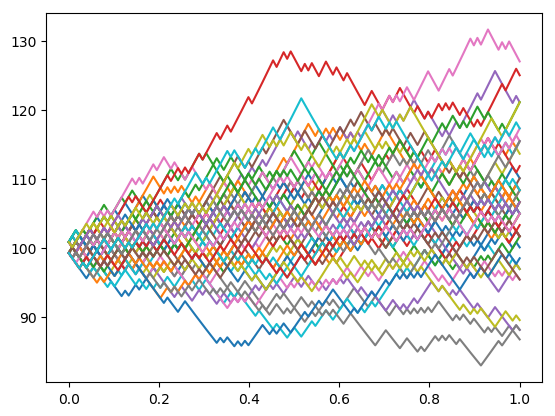

In [8]:
for i = 1:1:N
    W = 0;
    xrand = (2*rand( Binomial(1,0.5), M+1, 1)-1)*Deltax;
    W = cumsum(xrand);
    S = S0.*exp.( (mu - sigma.*sigma/2).*(tk - ctime) + sigma.*W  );
	plot(tk, S);
end

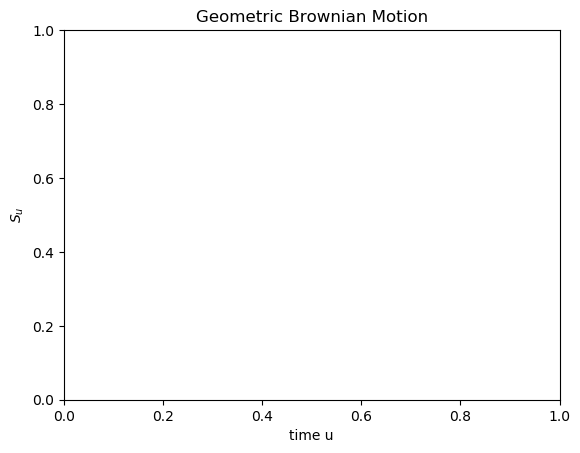

PyObject Text(26.400000000000013, 0.5, '$S_u$')

In [9]:
title("Geometric Brownian Motion")
xlabel("time u")
ylabel(L"$S_u$")

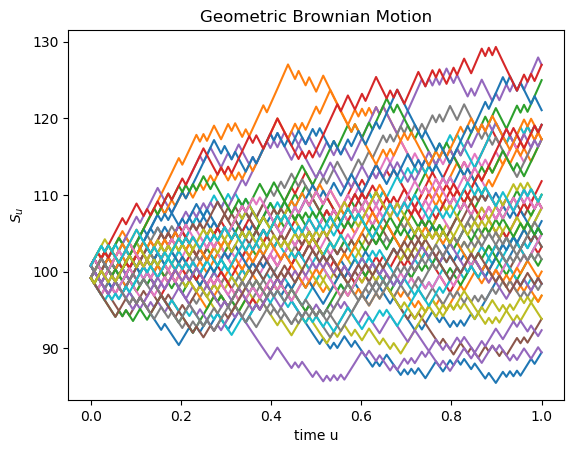

PyObject Text(26.400000000000013, 0.5, '$S_u$')

In [10]:
for i = 1:1:N
    W = 0;
    xrand = (2*rand( Binomial(1,0.5), M+1, 1)-1)*Deltax;
    W = cumsum(xrand);
    S = S0.*exp.( (mu - sigma.*sigma/2).*(tk - ctime) + sigma.*W  );
	plot(tk, S);
end

title("Geometric Brownian Motion")
xlabel("time u")
ylabel(L"$S_u$")

In [11]:
testRand = rand( Binomial(1,0.5), M+1, 1);

In [12]:
typeof(testRand)

Array{Int64,2}

In [13]:
?Binomial(1,0.5)

```
Binomial(n,p)
```

A *Binomial distribution* characterizes the number of successes in a sequence of independent trials. It has two parameters: `n`, the number of trials, and `p`, the probability of success in an individual trial, with the distribution:

$$
P(X = k) = {n \choose k}p^k(1-p)^{n-k},  \quad \text{ for } k = 0,1,2, \ldots, n.
$$

```julia
Binomial()      # Binomial distribution with n = 1 and p = 0.5
Binomial(n)     # Binomial distribution for n trials with success rate p = 0.5
Binomial(n, p)  # Binomial distribution for n trials with success rate p

params(d)       # Get the parameters, i.e. (n, p)
ntrials(d)      # Get the number of trials, i.e. n
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Binomial distribution on Wikipedia](http://en.wikipedia.org/wiki/Binomial_distribution)


In [14]:
?rand

search: rand randn rand! randn! randexp randperm randjump randexp! randcycle



```
rand([rng=GLOBAL_RNG], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:n` or `['x','y','z']`), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), and to $[0, 1)$ for floating point numbers;

`S` defaults to [`Float64`](@ref).

```
rand(s::Sampleable)
```

Generate one sample for `s`.

```
rand(s::Sampleable, n::Int)
```

Generate `n` samples from `s`. The form of the returned object depends on the variate form of `s`:

  * When `s` is univariate, it returns a vector of length `n`.
  * When `s` is multivariate, it returns a matrix with `n` columns.
  * When `s` is matrix-variate, it returns an array, where each element is a sample matrix.

```
rand(d::UnivariateDistribution)
```

Generate a scalar sample from `d`. The general fallback is `quantile(d, rand())`.

```
rand(d::UnivariateDistribution, n::Int) -> Vector
```

Generates a vector of `n` random scalar samples from `d`. The general fallback is to pick random samples from `sampler(d)`.

```
rand(d::MultivariateDistribution)
```

Sample a vector from the distribution `d`.

```
rand(d::MultivariateDistribution, n::Int) -> Vector
```

Sample n vectors from the distribution `d`. This returns a matrix of size `(dim(d), n)`, where each column is a sample.

```
rand(rng::AbstractRNG, d::AbstractMvNormal)
rand(rng::AbstractRNG, d::AbstractMvNormal, n::Int)
rand!(rng::AbstractRNG, d::AbstractMvNormal, x::AbstractArray)
```

Sample from distribution `d` using the random number generator `rng`.

```
rand(d::MatrixDistribution, n)
```

Draw a sample matrix from the distribution `d`.

```
rand(d::Union{UnivariateMixture, MultivariateDistribution})
```

Draw a sample from the mixture model `d`.

```
rand(d::Union{UnivariateMixture, MultivariateMixture}, n)
```

Draw `n` samples from `d`.


In [15]:
@less(Binomial(1,0.5))

Binomial(n::Integer, p::Integer) = Binomial(n, Float64(p))
Binomial(n::Integer) = Binomial(n, 0.5)
Binomial() = Binomial(1, 0.5)

@distr_support Binomial 0 d.n

#### Conversions

function convert(::Type{Binomial{T}}, n::Int, p::Real) where T<:Real
    Binomial(n, T(p))
end
function convert(::Type{Binomial{T}}, d::Binomial{S}) where {T <: Real, S <: Real}
    Binomial(d.n, T(d.p))
end


#### Parameters

ntrials(d::Binomial) = d.n
succprob(d::Binomial) = d.p
failprob(d::Binomial) = 1 - d.p

params(d::Binomial) = (d.n, d.p)
@inline partype(d::Binomial{T}) where {T<:Real} = T


#### Properties

mean(d::Binomial) = ntrials(d) * succprob(d)
var(d::Binomial) = ntrials(d) * succprob(d) * failprob(d)
function mode(d::Binomial{T}) where T<:Real
    (n, p) = params(d)
    n > 0 ? round(Int,(n + 1) * d.prob) : zero(T)
end
modes(d::Binomial) = Int[mode(d)]

median(d::Binomial) = round(Int,mean(d))

function skewness(d::Binomial)
    n, p1 = params(d)
    p0 = 1 - p1
    (p0 - p1) / sqrt(n * p0 * p1

In [ ]:
## Arrays

In [ ]:
a = [10, 20, 30]

In [ ]:
a = ["foo", "bar", 10]

In [ ]:
typeof(randn(100))

In [ ]:
b = Array{Float64}(5,1)

In [ ]:
size(a)

In [ ]:
ndims(a)

In [ ]:
typeof(b)

In [ ]:
ndims(b)

In [ ]:
c = eye(3)

In [ ]:
size(c)

In [ ]:
d = diagm([2, 4])

In [ ]:
## Vector ... or  Matrix

In [ ]:
Array{Int64, 1} == Vector{Int64}

In [ ]:
Array{Int64, 1} == Matrix{Int64}


In [ ]:
Array{Int64, 2} == Matrix{Int64}


In [ ]:
Array{Int64, 3} == Matrix{Int64}


In [ ]:
Array{Int64, 2} == Tensor{Int64}

# https://cloud.google.com/blog/products/gcp/an-in-depth-look-at-googles-first-tensor-processing-unit-tpu

In [ ]:
## Vector ... or  Matrix: we need to change `dims'

In [ ]:
a = [10, 20, 30, 40]


In [ ]:
b = reshape(a, 2, 2)


In [ ]:
ndims(a)

In [ ]:
ndims(b)

In [ ]:
b[1, 1] = 100

In [ ]:
b

In [ ]:
c = [1 2 3 4]

In [ ]:
size(c)

In [ ]:
ndims(c)

In [ ]:
size(a)

In [ ]:
ndims(a)

In [ ]:
# do you know what the difference is here?

In [ ]:
squeeze(c, 1) # so-called `Flat array!'

In [ ]:
## Play by arrays

In [ ]:
eye(2)

In [ ]:
zeros(3)

In [ ]:
zeros(3,2)

In [ ]:
x = Array{Float64}(7, 1)

In [ ]:
ones(2, 2)

In [ ]:
fill("foo", 2, 2)

In [ ]:
# why do we NEED the above?

In [ ]:
a = [10, 20, 30, 40]

In [ ]:
a = [10 20; 30 40] 

In [ ]:
ndims(a)

In [ ]:
a = [10; 20; 30; 40]

In [ ]:
ndims(a)

In [ ]:
# as seen in MATALB...

In [ ]:
# array indexing

In [ ]:
a = collect(10:10:40)


In [ ]:
a[end-1]

In [ ]:
a[1:3]

In [ ]:
a[end]

In [ ]:
a = randn(2, 2)

In [ ]:
a[1, 2]

In [ ]:
a[1, :]  # First row

In [ ]:
# then second column?

In [ ]:
a[:, 2]  

In [ ]:
# to use FIND-alike functions...

In [ ]:
a = randn(2, 2)

In [ ]:
b = [true false; false true]


In [ ]:
a[b] # indexing with boolean!

In [ ]:
a = Array{Float64}(3)


In [ ]:
b = Array{Float64}(3,2)


In [ ]:
a[2:end] = 42


In [ ]:
a

In [ ]:
# data on arrays

In [ ]:
a = ones(3)


In [ ]:
b = a

In [ ]:
b[3]

In [ ]:
b[3] = 44

In [ ]:
a

In [ ]:
# wow: it is doing "REFRENCING"...

In [ ]:
# to avoid this...

In [ ]:
a = ones(3)


In [ ]:
c = copy(a)

In [ ]:
b[3] = 44


In [ ]:
b

In [ ]:
a

In [ ]:
a = [-1, 0, 1]


In [ ]:
length(a)


In [ ]:
sum(a)

In [ ]:
mean(a)

In [ ]:
std(a)

In [ ]:
var(a)


In [ ]:
max(a)

In [ ]:
max(a,0)

In [ ]:
max.(a,0)

In [ ]:
maximum(a)

In [ ]:
b = [2 3; 4 5]

In [ ]:
max(b)

In [ ]:
max.(b,0)

In [ ]:
maximum(b)

In [ ]:
c = sort(a, rev=true)

In [ ]:
c === a 

In [ ]:
c == a

In [ ]:
a

In [ ]:
c

In [ ]:
d = a

In [ ]:
d == a

In [ ]:
d === a

In [ ]:
c = sort(a, rev=true)

In [ ]:
c === a

In [ ]:
a

In [ ]:
d = sort!(a, rev=true)

In [ ]:
d === a

In [ ]:
a

In [ ]:
?sort

In [ ]:
# matrix algebra

In [ ]:
a = ones(1, 2)

In [ ]:
b = ones(2, 2)


In [ ]:
a*b

In [ ]:
b * a'

In [ ]:
# To solve the linear system A X = B for X use A \ B



In [ ]:
A = [1 2; 2 3]

In [ ]:
B = ones(2, 2)


In [ ]:
A \ B


In [ ]:
ones(2)

In [ ]:
ones(2) * ones(2)

In [ ]:
# then...

In [ ]:
dot(ones(2), ones(2))

In [ ]:
b = ones(2, 2)

In [ ]:
b * ones(2)


In [ ]:
ones(2) * b


In [ ]:
# Elementwise

In [ ]:
ones(2, 2) * ones(2, 2)

In [ ]:
ones(2, 2) .* ones(2, 2)

In [ ]:
# use . options

In [ ]:
A = -ones(2, 2)


In [ ]:
A ^2

In [ ]:
A.^2

In [ ]:
A = ones(2, 2)

In [ ]:
2 * A  

In [ ]:
# Elementwise Comparisons

In [ ]:
a = [10, 20, 30]


In [ ]:
b = [-100, 0, 100]


In [ ]:
b > a

In [ ]:
b .> a

In [ ]:
a == b

In [ ]:
a .== b

In [ ]:
b .> 1

In [ ]:
max.(b, 1)

In [ ]:
# indexing...

In [ ]:
a = randn(4)

In [ ]:
a .< 0


In [ ]:
a[a .< 0] # did we learn? YES!

In [ ]:
# to simplify this...

In [ ]:
[log(x) for x in ones(4)]
